# <center> Project - ISE529
<center> 13 Dec 19
    </center>
    
    Group - GOATeam
    Members:
        Junteng Zheng 6796-15-9196
        Hsuan-Hsuan Wu 4492-15-4713
        Boxue Li 9814-33-3187
        Sean Eskew 8439-71-6736
        
### Preface

Below is our work for the "Santander Customer Transaction Prediction" Competition on Kaggle.  Our work is divided into three major portions; Data Exploration, Data Preprocessing, and Data Modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import lightgbm as lgb

/Users/clairewu0221/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.preprocessing import QuantileTransformer

In [6]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


## Data Exploration

We begin this project by first exploring our data to see if we can find useful information to

First we visualize the data with a simple head call.  Here we can see that each identity has an identifying 'ID_code', a response variable of 'target', and 200 features (var_0 to var_199).

In [8]:
data_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [11]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [22]:
data_train['target'].unique()

array([0, 1])

We can see that there are 200000 entries in our data and confirm that our response is binary.

Now we check that there is no missing data in the dataframe.

In [12]:
data_train.isnull().sum().sum()

0

Now we also check there is no duplicate rows in the dataframe.

In [15]:
data_train.duplicated().sum()

0

Next we search our data to see if there is any correlation between our data to see its effect on our future models.  We first pull a random assortment of features to calculate and visualize the correlations.

In [32]:
feature = data_train[2:].columns
random_feature = np.random.choice(feature, size=10, replace=False)
data_train[random_feature][::20].corr()

,var_2,var_75,var_110,var_79,var_147,var_128,var_5,var_39,var_161,var_142
var_2,1.000000,-0.004244,-0.006466,0.014623,-0.001833,0.012307,0.019515,-0.001549,0.007980,0.000278
var_75,-0.004244,1.000000,-0.014130,0.011349,-0.003676,0.007264,-0.021980,0.015857,0.003898,-0.001122
var_110,-0.006466,-0.014130,1.000000,0.012171,-0.000576,-0.002749,-0.007883,0.006717,-0.002725,-0.017429
var_79,0.014623,0.011349,0.012171,1.000000,-0.005268,-0.008138,0.006545,-0.000559,-0.005845,-0.000419
var_147,-0.001833,-0.003676,-0.000576,-0.005268,1.000000,0.021498,0.003239,-0.006051,0.008731,-0.004988
var_128,0.012307,0.007264,-0.002749,-0.008138,0.021498,1.000000,-0.007772,-0.007630,0.003070,0.006167
var_5,0.019515,-0.021980,-0.007883,0.006545,0.003239,-0.007772,1.000000,-0.005864,0.001263,0.013953
var_39,-0.001549,0.015857,0.006717,-0.000559,-0.006051,-0.007630,-0.005864,1.000000,-0.004720,-0.003358
var_161,0.007980,0.003898,-0.002725,-0.005845,0.008731,0.003070,0.001263,-0.004720,1.000000,0.021861
var_142,0.000278,-0.001122,-0.017429,-0.000419,-0.004988,0.006167,0.013953,-0.003358,0.021861,1.000000


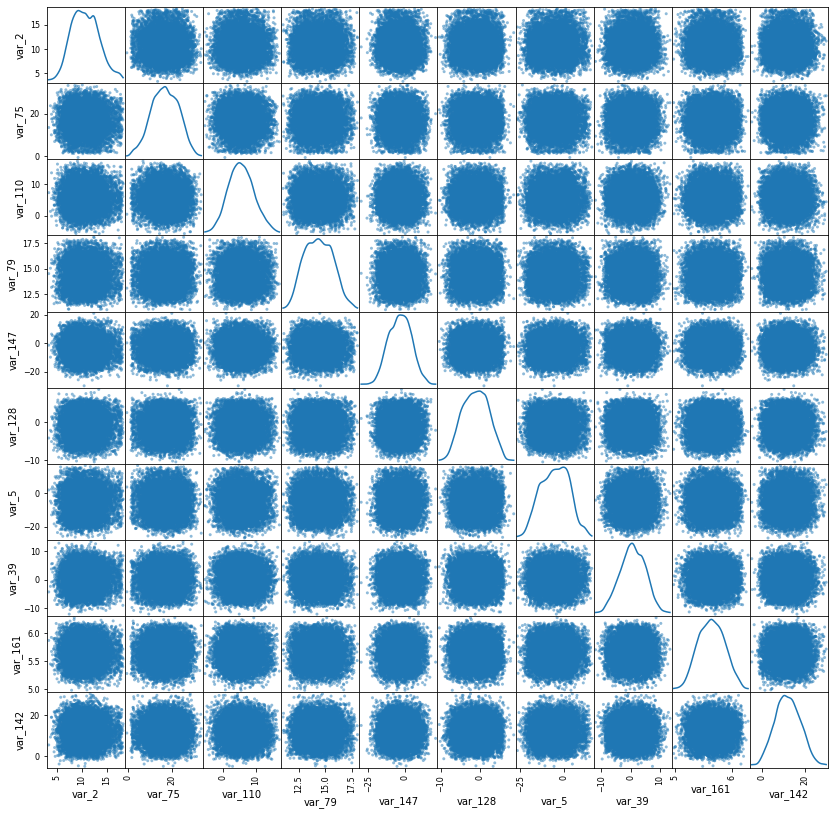

In [34]:
scatter_matrix(data_train[random_feature][::20], diagonal= 'kde',figsize=(14,14));

We then search for the maximum correlations.  The maximum value is .009844, which shows that there is very little correlation between our feature set.

In [35]:
correlations = data_train.drop(columns=['ID_code','target']).corr()\
            .abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


## Data Preprocessing

### Feature Engineering

From research through participants notebooks("Santander EDA and Prediction” by Gabriel Preda), we found that some feature engineering will assist in our prediction. Our goal for this portion is to utilize all 200 features to create 8 new features based on their combined statistical information.

In [36]:
%%time
idx = features = data_train.columns.values[2:202]
for df in [data_train, data_test]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 16.4 s, sys: 5.33 s, total: 21.7 s
Wall time: 12.6 s


### Data Balancing

Now we check the distribution between Target 0 and Target 1 to see how well balanced our provided dataset is.  We can see that only about 10% of our data is in the Target 1 category.  This is highly unbalanced, and we saw during our initial trials that it led to very poorly performing models that tended to predict Target 0 more often.

In [47]:
data_train.groupby('target').size()

target
0    179902
1     20098
dtype: int64

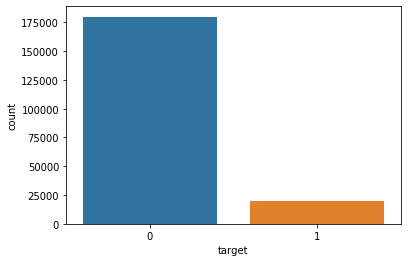

In [23]:
sns.countplot(data_train['target'])
plt.show()

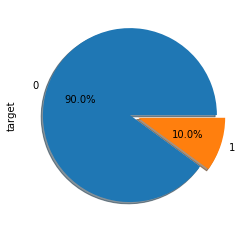

In [48]:
data_train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

Now we'll address our dataset's imbalance.  Here we want to create our data set in such a way that 

In [50]:
# Balancing method found at https://elitedatascience.com/imbalanced-classes
# Separate majority and minority classes
df_one = data_train[data_train.target==1]
df_zero = data_train[data_train.target==0]
 
# Down-sample minority class
df_zero_down_sampled = resample(df_zero, 
                                 replace=True,     # sample with replacement
                                 n_samples=20098,  # to match minority class
                                 random_state=42)  # reproducible results
 
# Combine minority with down-sampled majority class
df_down_sampled = pd.concat([df_one, df_zero_down_sampled])
 
# Display new class counts
df_down_sampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

Now that our data is balanced we will convert it to into our X and y's respective Train and Test sets.

In [53]:
y = df_down_sampled.target
X = df_down_sampled.drop(columns=['target','ID_code'])

In [54]:
X_pred = data_test.drop(columns=['ID_code'])

In [55]:
#kfold = KFold(n_splits = 5, random_state=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .9, test_size =.1)

### Normalization

Now we normalize the data.  We used three transformers and checked their performance.  StandardScaler performed the best between itself, MinMaxScaler, QuantileTransformer.

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_pred = scaler.transform(X_pred)

In [58]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_pred = scaler.transform(X_pred)

In [59]:
#scaler = QuantileTransformer(n_quantiles=10, random_state=0)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_pred = scaler.transform(X_pred)

### Principle Component Analysis

We attempted to use PCA to transform our data set.  However, using the full data set proved to perform better in the end.

In [60]:
# pca = PCA(0.50).fit(X_train)
# pca.n_components_

92

In [63]:
# X_train_comp = pca.transform(X_train)
# X_test_comp = pca.transform(X_test)

## Data Modeling

### Initial Analysis
We initially tested various models with untuned hyper-parameters to see the general performance of the different models.  We'll use these to set our priorities for tuning.

In [64]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Tree',DecisionTreeClassifier()))
models.append(('NB',GaussianNB())) # No additional tuning required
models.append(('SVM',SVC(kernel='rbf',gamma=1)))
models.append(('RF',RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('GBM',LGBMClassifier()))

In [65]:
names = []
results = []
means = []
sdevs = []
scoring = 'accuracy'

In [66]:
for name, model in models:
    model.fit(X_train, y_train)
    means.append(model.score(X_test, y_test))
    #sdevs.append(cv_results.std())
    names.append(name)

/Users/clairewu0221/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/clairewu0221/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
df1 = pd.DataFrame()
df1['name'] = names
df1['accuracy'] = means
#df1['accuracy_std_dev'] = sdevs
df1

,name,accuracy
0,LR,0.793532
1,LDA,0.792289
2,KNN,0.563682
3,Tree,0.609453
4,NB,0.802239
5,SVM,0.551493
6,RF,0.658209
7,XGB,0.754975
8,GBM,0.791542


Here we see the most promising models include Logistic Regression, Linear Discriminant Analysis, Naive Bayes, XGBoost, and Light GMB.  Next we'll check the performance of a generic neural network.

In [68]:
model = Sequential()
model.add(Dense(128,kernel_initializer = 'uniform', activation = 'relu', input_shape=(208,)))
model.add(Dense(128,kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(64,kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.fit(X_train,y_train,epochs=20,batch_size=1)

Epoch 1/20
36176/36176 [==============================] - 33s 913us/step - loss: 0.1077 - accuracy: 0.9650
Epoch 2/20
10169/36176 [=======>......................] - ETA: 23s - loss: 0.0845 - accuracy: 0.9708

KeyboardInterrupt: 

In [163]:
model.evaluate(X_test,y_test,verbose=0)

[1.908622086463283, 0.7298507690429688]

This neural network after 20 epochs ranks 6th of our initial models.  As it is such a time intensive model, we will focus on other models before revisiting the neural network.

In [164]:
#y_pred = model.predict(X_pred)
#y_pred2 = (y_pred > .5).astype(int)

In [165]:
#output = pd.DataFrame()
#output['ID_code'] = data_test.ID_code
#output['Target'] = y_pred2
#output.to_csv('santander_output5.csv', index=False)

### Data Tuning

We now move to tuning our models.  With a dataset this size, we found that tuning took a significant amount of time.  This limited us from fully tuning all models, but instead focusing on the models with highest potential.

In [287]:
m0 = GaussianNB() # No Tuning Required
m0.fit(X_train, y_train)
m0.score(X_test, y_test)

0.7947761194029851

In [288]:
yproba1 = m0.predict_proba(X_test)

In [289]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [290]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.877556006634156

In [291]:
yproba2 = m2.predict_proba(X_train)

In [292]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

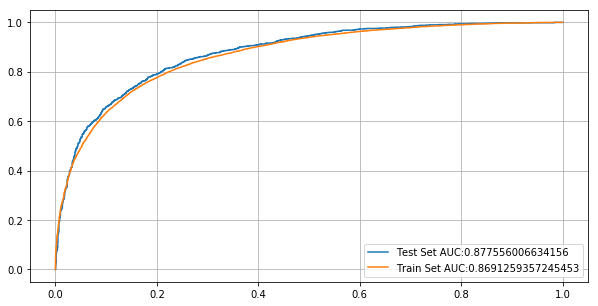

In [293]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

In [278]:
# Choose the type of classifier. 
clf = LogisticRegression()

# Choose some parameter combinations to try
parameters = {'penalty': ['l1', 'l2'], 
              'C':  np.logspace(-4, 4, 20),
              'solver': ['liblinear'], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m1 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m1.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [279]:
m1.score(X_test,y_test)

0.7845771144278607

In [280]:
yproba1 = m1.predict_proba(X_test)

In [281]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [282]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8639252914820408

In [283]:
yproba2 = m2.predict_proba(X_train)

In [284]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

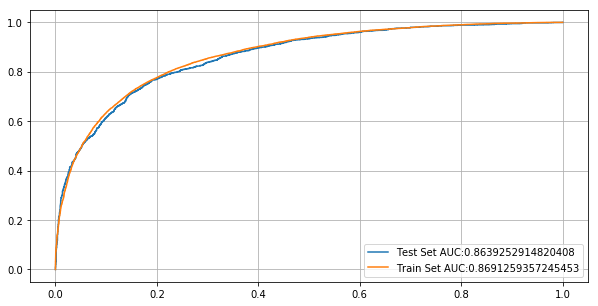

In [285]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

Our logistic regression remains relatively unchanged after tuning.

In [268]:
# Choose the type of classifier. 
clf = LinearDiscriminantAnalysis()

# Choose some parameter combinations to try
parameters = {'solver': ['svd','lsqr'],
              'n_components': [5,10,100,None],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m2.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packa

LinearDiscriminantAnalysis(n_components=5, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [269]:
m2.score(X_test,y_test)

0.7855721393034826

In [277]:
yproba1 = m2.predict_proba(X_test)

In [271]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [272]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8639002896254673

In [274]:
yproba2 = m2.predict_proba(X_train)

In [275]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

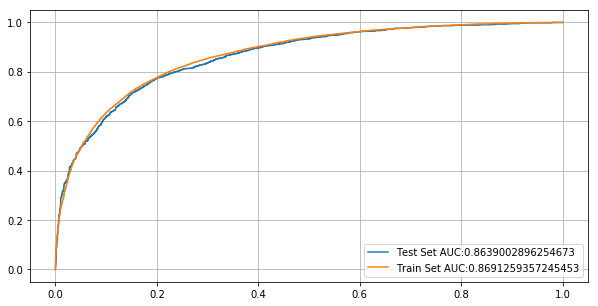

In [276]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

Another slight improvement from tuning; however, still no significant increase.

Now we move on to our XGBoost.  This model has potential; however, it was a challenge to train it due to the time requirements to run through our data set.  We used the highspeed computing available from Amazon Web Services' SageMaker console, but still saw our ensemble models taking a significant amount of time to run (hours for anything greater than a 6 parameter, 3 fold GridSearch).

We attempted tune with smaller batches, using PCA to limit the features, and use a hypopt function to train without kfolds.  But all of those methods left us with degraded results.  In the end, our model performed better with more limited tuning while compared to the entire balanced dataset.

In [206]:
%%time
# Choose the type of classifier. 
clf = XGBClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [100, 500], 
              'max_depth': [2], 
              'learning_rate': [.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m3 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m3.fit(X_train, y_train)

CPU times: user 12min 30s, sys: 0 ns, total: 12min 30s
Wall time: 12min 30s


In [207]:
grid_obj.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [224]:
m3.score(X_test,y_test)

0.8074626865671641

In [227]:
yproba1 = m3.predict_proba(X_test)

In [229]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [230]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8896141249247536

In [232]:
yproba2 = m3.predict_proba(X_train)

In [237]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

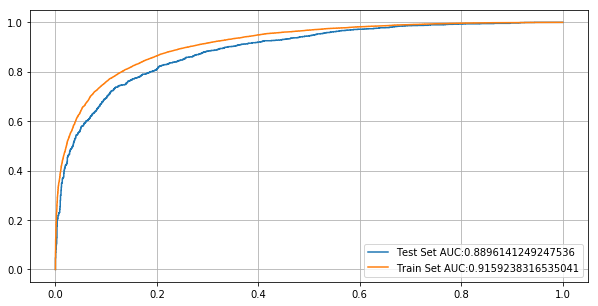

In [238]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

We see an improvement of almost 6 percent with our tuned model placing XGBoost as our current top model.  However, despite the tuning we are still performing relatively poorly compared to the other competitors.  To improve our performance further we moved onto the Light GMB Model

## Light Gradient Boost Model - Final Submission

So far our efforts have resulted in small improvements.  To increase these, we researched the notebooks of past competitors to find methods that can help us improve our scores from high 70s/low 80s to high 80s/low 90s.  The most beneficial Jupyter Notebook we utilized was "Santander Magic LGB 0.901" by Nanashi, which introduced a better approach "Light Gradient Boost Model" that results in a significantly increased score.  

In [190]:
from numba import jit

In [191]:
@jit
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [192]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [196]:
#kfold = 15
#folds = StratifiedKFold(n_splits=kfold, shuffle=False, random_state=44000)
num_folds = 11
features = [c for c in df_upsampled.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(df_upsampled))
getVal = np.zeros(len(df_upsampled))
predictions = np.zeros(200000)
feature_importance_df = pd.DataFrame()

In [203]:
test = data_test.iloc[:,1::]
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_upsampled.values, df_upsampled.values)):
    
    X_train, y_train = df_upsampled.iloc[trn_idx][features], df_upsampled.target.iloc[trn_idx]
    X_valid, y_valid = df_upsampled.iloc[val_idx][features], df_upsampled.target.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(df_upsampled.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(df_upsampled.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

Fold idx:1
Training until validation scores don't improve for 4000 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.585291	valid_1's auc: 1
Fold idx:2
Training until validation scores don't improve for 4000 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.585795	valid_1's auc: 1
Fold idx:3
Training until validation scores don't improve for 4000 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.586555	valid_1's auc: 1
Fold idx:4
Training until validation scores don't improve for 4000 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.586725	valid_1's auc: 1
Fold idx:5
Training until validation scores don't improve for 4000 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.585724	valid_1's auc: 1
Fold idx:6
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.926655	valid_1's auc: 0.896584
[10000]	training's auc: 0.943065	valid_1's auc: 0.899439
[15000]	training's auc: 0.956507	valid

In [ ]:
sub6 = pd.DataFrame({"ID_code":data_test["ID_code"].values})
sub6["target"] = predictions
sub6.to_csv("sub6.csv", index=False)

This allowed us to create a tuned Light GBM model to increase our Kaggle score to _**89.4%**_.  This score falls within the .  With the highest score on the leader board being 92.6%.